In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/bhl

Mounted at /gdrive
/gdrive/MyDrive/bhl


In [ ]:
import pandas as pd

final_train = pd.read_csv('final_train.csv')
final_train = final_train.drop(['Unnamed: 0'], axis = 1)

# cols = ['Activity', 'subject']
# filled.to_csv('/gdrive/MyDrive/bhl/data_nona.csv', index=False)

In [ ]:
pd.read_csv('/gdrive/MyDrive/bhl/unbalanced_raw/train.csv').shape

(7262, 572)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

np.random.seed(123)
test_size = 3
subjects = filled['subject'].unique()
removed_subjects = [28, 9]
subjects = [x for x in subjects if x not in removed_subjects]
test_subjects = list(np.random.choice(subjects, size = test_size, replace=False))
train_subjects = [x for x in subjects if x not in test_subjects]

In [ ]:
ftrain = final_train.query('subject in @train_subjects')
ftest = final_train.query('subject in @test_subjects')
ftrain.to_csv('/gdrive/MyDrive/bhl/unbalanced_raw/train.csv', index=False)
ftest.to_csv('/gdrive/MyDrive/bhl/unbalanced_raw/test.csv', index=False)

In [ ]:
filled = final_train.copy()
filled[filled.columns.difference(cols)] = final_train.groupby(cols).transform(lambda x: x.fillna(x.mean()))[filled.columns.difference(cols)]

In [ ]:
import numpy as np

corr_cols = cols_with_threshold_above(filled, .95)
df_nocorr = filled.drop(corr_cols, axis = 1)
df_nocorr = df_nocorr.drop_duplicates()

In [ ]:
print(test_subjects, train_subjects)

[19, 21, 17] [30, 25, 23, 27, 14, 7, 22, 15, 10, 24, 4, 5, 12, 3, 26, 18, 13, 6, 2, 16, 11, 29, 20, 8, 1]


In [ ]:
train_df = df_nocorr.query('subject in @train_subjects')

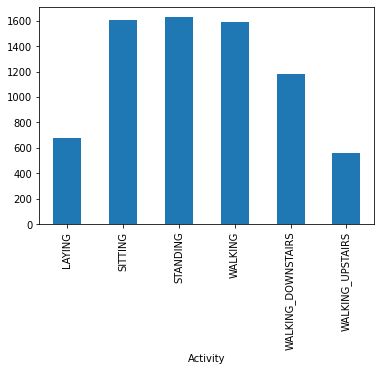

In [ ]:
train_df.groupby(['Activity']).size().plot.bar()

In [ ]:
test_df.groupby(['Activity']).size()

Activity
LAYING                102
SITTING               268
STANDING              211
WALKING               223
WALKING_DOWNSTAIRS    119
WALKING_UPSTAIRS       61
dtype: int64

In [ ]:
test_df = df_nocorr.query('subject in @test_subjects')

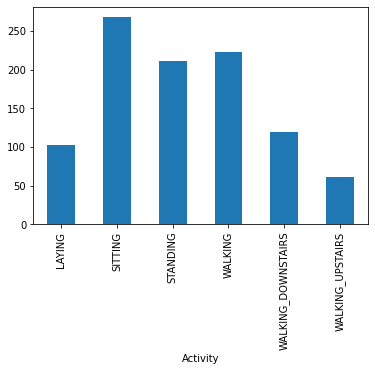

In [ ]:
test_df.groupby(['Activity']).size().plot.bar()

In [ ]:
train_df.to_csv('/gdrive/MyDrive/bhl/uneven/train.csv', index=False)
test_df.to_csv('/gdrive/MyDrive/bhl/uneven/test.csv', index=False)

In [ ]:
train_df_undersampled = train_df.groupby(['Activity']).apply(lambda x: x.sample(n = 550, random_state = 123)).reset_index(drop=True)

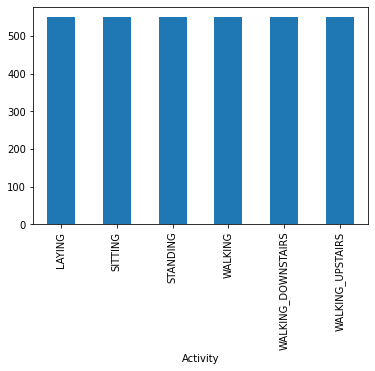

In [ ]:
train_df_undersampled.groupby(['Activity']).size().plot.bar()

In [ ]:
test_df_undersampled = test_df.groupby(['Activity']).apply(lambda x: x.sample(n = 60, random_state = 123)).reset_index(drop=True)

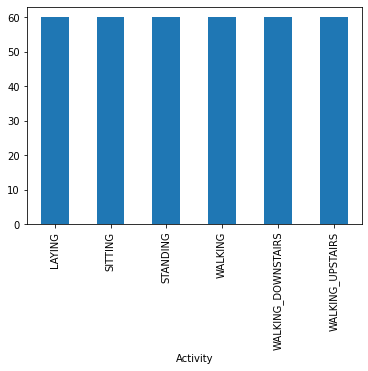

In [ ]:
test_df_undersampled.groupby(['Activity']).size().plot.bar()

In [ ]:
train_df_undersampled.to_csv('/gdrive/MyDrive/bhl/undersampled/train.csv', index=False)
test_df_undersampled.to_csv('/gdrive/MyDrive/bhl/undersampled/test.csv', index=False)

In [ ]:
def cols_with_threshold_above(df, threshold):
  c = df.corr().abs()
  sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

  col_corr = []
  for index in sol.index:
    colA, colB = index
    if((sol[index] > threshold) and (colB not in col_corr)):
      if colA not in col_corr:
        col_corr.append(colA)
  return col_corr

In [ ]:
df_nocorr.head(3)

,Activity,"angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-49,64.1","fBodyAcc-bandsEnergy()-49,64.2","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-57,64.1","fBodyAcc-bandsEnergy()-57,64.2",fBodyAcc-main()-X,fBodyAcc-main()-Z,fBodyAcc-max()-Z,fBodyAcc-maxInds-X,fBodyAcc-maxInds-Y,fBodyAcc-maxInds-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAcc-min()-X,fBodyAcc-min()-Y,fBodyAcc-min()-Z,fBodyAcc-skewness()-X,fBodyAcc-skewness()-Y,fBodyAcc-skewness()-Z,"fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,8.1","fBodyAccJerk-bandsEnergy()-1,8.2","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-17,32.1","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-25,48.1","fBodyAccJerk-bandsEnergy()-33,48.1","fBodyAccJerk-bandsEnergy()-33,48.2",...,tBodyGyroJerkMag-arCoeff()2,tBodyGyroJerkMag-arCoeff()3,tBodyGyroJerkMag-arCoeff()4,tBodyGyroJerkMag-energy(),tBodyGyroJerkMag-min(),tBodyGyroJerkMag-std(),tBodyGyroMag-arCoeff()1,tBodyGyroMag-arCoeff()2,tBodyGyroMag-arCoeff()3,tBodyGyroMag-arCoeff()4,tBodyGyroMag-entropy(),tBodyGyroMag-min(),tBodyGyroMag-std(),"tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-entropy(),tGravityAccMag-mad(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.861714,0.115517,-2.023369,3.125860,-9.474436,2.828395,8.603183,2.624547,-3.005993,8.790053,3.406503,-5.543996,6.408839,9.483702,5.966655,-2.672743,0.495253,3.803078,1.841663,0.515509,-5.575766,3.875239,-1.953725,-0.213009,3.089457,3.471521,0.476703,4.245318,6.752908,-0.222043,5.566325,2.635961,5.245647,7.274862,2.178234,0.019318,-5.361465,-0.614336,-1.772059,...,-2.512888,-1.659920,2.913753,1.671859,5.963808,-2.580826,2.517538,-4.148770,-1.220225,-2.455602,2.614605,1.432706,5.308319,-1.782976,1.462287,1.045529,-4.550038,2.872206,2.988204,-3.422785,1.852121,8.394366,3.246233,0.937300,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,5.774536,1.754626,1.180533,3.272281,-0.823302,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.527046,8.046001,2.081277,-3.081267,8.709075,3.331663,-5.624891,6.374807,9.473232,5.941206,1.747470,0.455411,3.735764,1.884223,0.464380,-4.166525,4.666893,-1.886313,-0.105111,2.883141,3.452733,-0.228654,4.572307,6.872288,-0.816047,5.208193,2.488196,5.113046,7.395249,2.136318,-0.323548,-5.351103,-0.540306,-1.775080,...,-2.145136,-2.280084,4.094161,1.660629,4.879087,-2.404219,2.404920,-3.429157,-1.324363,-2.314153,4.157260,1.478686,4.198657,-2.507020,-0.410167,0.710234,-4.610474,2.450700,2.859864,-3.387872,1.698743,8.112279,1.926083,2.348895,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.618405,1.727481,0.220730,4.440779,-2.689605,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.915239,0.067613,-0.887342,6.007361,-11.906904,2.845718,8.618923,2.640759,-2.999393,8.803784,3.408530,-5.544029,6.409734,9.486347,5.851475,0.283737,0.510324,3.705847,2.097024,0.259861,-3.680471,3.200299,-2.008311,-0.201614,3.158938,3.511681,-0.536331,4.756959,6.917766,-0.221541,5.566188,2.644645,5.246462,7.269256,2.193711,0.049267,-5.364367,-0.627548,-1.771271,...,-2.527761,-1.912424,3.446351,1.672549,5.963879,-2.656659,2.52902

In [ ]:
df_nocorr.groupby(['Activity', 'subject']).

In [ ]:
df_nocorr = df_nocorr.drop(['void()', axis = 1])


def remove_close_entries(df):
  

In [ ]:
nocorr_grouped = df_nocorr.groupby(['Activity', 'subject']).size()
nocorr_grouped[nocorr_grouped > 200]

Activity          subject
LAYING            28         1348
WALKING_UPSTAIRS  9           991
dtype: int64

In [ ]:
eps = 0.01


In [ ]:
df_nocorr.head(3)

,Activity,"angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-49,64.2","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-57,64.1","fBodyAcc-bandsEnergy()-57,64.2",fBodyAcc-main()-X,fBodyAcc-main()-Z,fBodyAcc-maxInds-X,fBodyAcc-maxInds-Y,fBodyAcc-maxInds-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAcc-min()-X,fBodyAcc-min()-Y,fBodyAcc-min()-Z,fBodyAcc-skewness()-X,fBodyAcc-skewness()-Y,fBodyAcc-skewness()-Z,"fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,8.1","fBodyAccJerk-bandsEnergy()-1,8.2","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-25,48.1","fBodyAccJerk-bandsEnergy()-41,48","fBodyAccJerk-bandsEnergy()-41,48.1","fBodyAccJerk-bandsEnergy()-41,48.2","fBodyAccJerk-bandsEnergy()-49,64","fBodyAccJerk-bandsEnergy()-49,64.1","fBodyAccJerk-bandsEnergy()-49,64.2","fBodyAccJerk-bandsEnergy()-57,64","fBodyAccJerk-bandsEnergy()-57,64.1","fBodyAccJerk-bandsEnergy()-57,64.2","fBodyAccJerk-bandsEnergy()-9,16","fBodyAccJerk-bandsEnergy()-9,16.2",...,tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerkMag-arCoeff()1,tBodyGyroJerkMag-arCoeff()2,tBodyGyroJerkMag-arCoeff()3,tBodyGyroJerkMag-arCoeff()4,tBodyGyroJerkMag-min(),tBodyGyroJerkMag-std(),tBodyGyroMag-arCoeff()2,tBodyGyroMag-arCoeff()3,tBodyGyroMag-arCoeff()4,tBodyGyroMag-entropy(),tBodyGyroMag-min(),"tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-mad(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
0,STANDING,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.406503,-5.543996,6.408839,9.483702,5.966655,-2.672743,3.803078,1.841663,0.515509,-5.575766,3.875239,-1.953725,-0.213009,3.089457,3.471521,0.476703,4.245318,6.752908,5.566325,2.635961,5.245647,0.019318,-5.361465,7.549080,3.025084,4.313152,7.722526,0.716254,8.553989,7.385247,4.286267,1.104553,2.361898,-0.988790,...,1.094581,0.533126,2.227442,-1.103444,-2.512888,-1.659920,2.913753,5.963808,-2.580826,-4.148770,-1.220225,-2.455602,2.614605,1.432706,-1.782976,1.462287,1.045529,-4.550038,2.872206,2.988204,-3.422785,1.852121,8.394366,3.246233,0.937300,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,5.774536,1.754626,1.180533,-0.823302,-1.007695,3.094236,1.669987,1.0
1,WALKING_UPSTAIRS,-1.751117,0.218134,0.280294,7.953403,-0.679894,3.331663,-5.624891,6.374807,9.473232,5.941206,1.747470,3.735764,1.884223,0.464380,-4.166525,4.666893,-1.886313,-0.105111,2.883141,3.452733,-0.228654,4.572307,6.872288,5.208193,2.488196,5.113046,-0.323548,-5.351103,7.186974,2.950797,4.263220,7.582895,0.720532,8.267096,7.363456,4.286284,0.941045,2.594619,-1.055049,...,1.156491,0.567243,1.192297,-1.138702,-2.145136,-2.280084,4.094161,4.879087,-2.404219,-3.429157,-1.324363,-2.314153,4.157260,1.478686,-2.507020,-0.410167,0.710234,-4.610474,2.450700,2.859864,-3.387872,1.698743,8.112279,1.926083,2.348895,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.618405,1.727481,0.220730,-2.689605,-0.572410,-2.187890,-0.544652,2.0
2,LAYING,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.408530,-5.544029,6.409734,9.486347,5.851475,0.283737,3.705847,2.097024,0.259861,-3.680471,3.200299,-2.008311,-0.201614,3.158938,3.511681,-0.536331,4.756959,6.917766,5.566188,2.644645,5.246462,0.049267,-5.364367,7.568584,3.040102,4.321599,7.727894,0.714333,8.560393,7.385266,4.286263,1.108423,2.361653,-0.988070,...,1.116531,0.496151,2.328004,

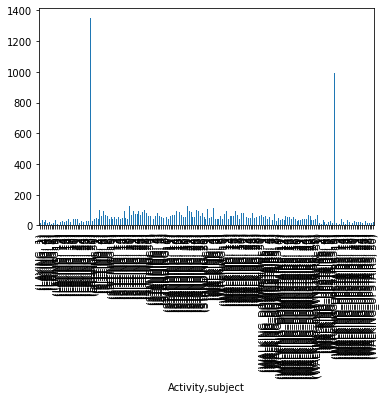

In [ ]:
nocorr_grouped.plot.bar()

In [ ]:
df_nocorr.drop_duplicates().query('Activity == "LAYING" and subject == 28')

,Activity,"angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-49,64.1","fBodyAcc-bandsEnergy()-49,64.2","fBodyAcc-bandsEnergy()-57,64","fBodyAcc-bandsEnergy()-57,64.1","fBodyAcc-bandsEnergy()-57,64.2",fBodyAcc-main()-X,fBodyAcc-main()-Z,fBodyAcc-max()-Z,fBodyAcc-maxInds-X,fBodyAcc-maxInds-Y,fBodyAcc-maxInds-Z,fBodyAcc-meanFreq()-X,fBodyAcc-meanFreq()-Y,fBodyAcc-meanFreq()-Z,fBodyAcc-min()-X,fBodyAcc-min()-Y,fBodyAcc-min()-Z,fBodyAcc-skewness()-X,fBodyAcc-skewness()-Y,fBodyAcc-skewness()-Z,"fBodyAccJerk-bandsEnergy()-1,16","fBodyAccJerk-bandsEnergy()-1,8","fBodyAccJerk-bandsEnergy()-1,8.1","fBodyAccJerk-bandsEnergy()-1,8.2","fBodyAccJerk-bandsEnergy()-17,32","fBodyAccJerk-bandsEnergy()-17,32.1","fBodyAccJerk-bandsEnergy()-25,48","fBodyAccJerk-bandsEnergy()-25,48.1","fBodyAccJerk-bandsEnergy()-33,48.1","fBodyAccJerk-bandsEnergy()-33,48.2",...,tBodyGyroJerkMag-arCoeff()2,tBodyGyroJerkMag-arCoeff()3,tBodyGyroJerkMag-arCoeff()4,tBodyGyroJerkMag-energy(),tBodyGyroJerkMag-min(),tBodyGyroJerkMag-std(),tBodyGyroMag-arCoeff()1,tBodyGyroMag-arCoeff()2,tBodyGyroMag-arCoeff()3,tBodyGyroMag-arCoeff()4,tBodyGyroMag-entropy(),tBodyGyroMag-min(),tBodyGyroMag-std(),"tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-entropy(),tGravityAccMag-mad(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void()
2,LAYING,-1.915239,0.067613,-0.887342,6.007361,-11.906904,2.845718,8.618923,2.640759,-2.999393,8.803784,3.40853,-5.544029,6.409734,9.486347,5.851475,0.283737,0.510324,3.705847,2.097024,0.259861,-3.680471,3.200299,-2.008311,-0.201614,3.158938,3.511681,-0.536331,4.756959,6.917766,-0.221541,5.566188,2.644645,5.246462,7.269256,2.193711,0.049267,-5.364367,-0.627548,-1.771271,...,-2.527761,-1.912424,3.446351,1.672549,5.963879,-2.656659,2.529025,-4.14352,-1.135395,-2.149391,4.260849,1.424766,5.780229,-2.835542,0.491285,1.552183,-4.910331,1.811968,3.717038,-4.070744,1.220517,7.690866,3.055395,1.937417,-2.500477,-3.788376,0.559196,5.893237,3.621391,1.430272,4.146776,5.407139,1.731942,0.066625,2.296603,-0.549843,-1.031522,-2.071755,2.024442,3.0
4,LAYING,-1.913523,0.067613,-0.887342,6.007361,-11.970485,2.845718,8.618923,2.640759,-2.999390,8.803784,3.40853,-5.544029,6.409734,9.486347,5.851475,5.993837,0.510324,3.705847,2.097024,0.259861,-3.680471,3.200299,-2.008311,-0.201614,3.158938,3.511681,-0.536331,4.756959,6.917766,-0.221541,5.566188,2.644645,5.246462,7.269256,2.193711,0.049267,-5.364367,-0.627548,-1.771271,...,-2.527761,-1.912424,3.446351,1.672549,5.963879,-2.656659,2.529025,-4.14352,-1.135395,-2.149391,4.260849,1.424766,5.780229,-2.835542,0.491285,1.552183,-4.910331,1.811968,3.717038,-4.070744,1.220517,7.690866,3.055395,1.937417,-2.500477,-3.769865,0.559196,5.893237,3.621391,1.430272,4.146776,5.407139,1.731942,0.066625,2.296603,-0.549843,-1.031522,-2.102513,2.024442,3.0
20,LAYING,-1.915239,0.067613,-0.887342,6.007361,-11.703481,2.845718,8.618923,2.640759,-2.999393,8.803784,3.40853,-5.544029,6.409734,9.486347,5.851475,0.283737,0.510324,3.705847,2.097024,0.259861,-3.680471,3.200299,-2.008311,-0.201614,3.158938,3.511681,-0.536331,4.756959,6.917766,-0.221541,5.566188,2.644645,5.246462,7.269256,2.193711,0.049267,-5.364367,-0.627548,-1.771271,...,-2.527761,-1.912424,3.446351,1.672549,5.963879,-2.656659,2.529025,-4.14352,-1.135

In [ ]:
test_subjects

array([17,  5, 20, 14, 13])

In [ ]:
out = train_subjects + test_subjects

In [ ]:
len(final_train)

11086

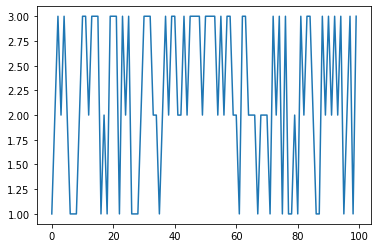

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns



plt.plot(final_train.iloc[:100,-1])

In [ ]:
activities = final_train["Activity"].unique()
final_train["Activity_id"] = final_train["Activity"].map(activ_dict)

In [ ]:
corrwithid = final_train.corrwith(final_train["Activity_id"]).abs()

In [ ]:
corrwithid[corrwithid > 0.4]

fBodyAcc-bandsEnergy()-1,16          0.425830
fBodyAcc-bandsEnergy()-1,24          0.424706
fBodyAcc-bandsEnergy()-1,8           0.462594
fBodyAcc-energy()-X                  0.424799
fBodyAcc-iqr()-X                     0.406502
fBodyAcc-iqr()-Y                     0.415542
fBodyAcc-max()-X                     0.400770
fBodyAccJerk-bandsEnergy()-1,24.1    0.404288
fBodyAccJerk-bandsEnergy()-1,8       0.452681
fBodyAccJerk-energy()-Y              0.409532
fBodyAccMag-energy()                 0.441520
fBodyBodyAccJerkMag-energy()         0.438690
fBodyBodyAccJerkMag-max()            0.430389
fBodyGyro-iqr()-Z                    0.417823
tBodyAcc-correlation()-X,Y           0.406490
tBodyAcc-energy()-X                  0.425370
tBodyAccJerk-energy()-Y              0.410237
tBodyAccJerk-max()-X                 0.429212
tBodyAccJerk-max()-Y                 0.426647
Activity_id                          1.000000
dtype: float64

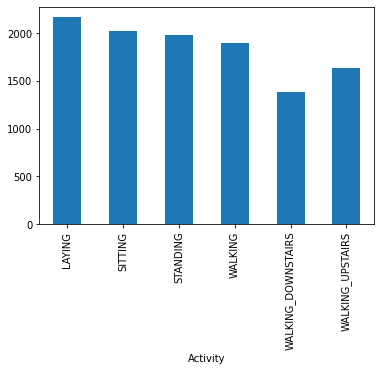

In [ ]:
final_train.groupby(["Activity"]).size().plot.bar()

In [ ]:
activ_dict

{'LAYING': 2,
 'SITTING': 4,
 'STANDING': 0,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 5,
 'WALKING_UPSTAIRS': 1}

In [ ]:
activ_dict = dict(zip(activities, range(len(activities))))
activ_dict

{'LAYING': 2,
 'SITTING': 4,
 'STANDING': 0,
 'WALKING': 3,
 'WALKING_DOWNSTAIRS': 5,
 'WALKING_UPSTAIRS': 1}

In [ ]:
c = final_train.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

In [ ]:
so

tBodyGyro-sma()             tBodyGyro-low()-Y             0.000010
tBodyGyro-low()-Y           tBodyGyro-sma()               0.000010
tGravityAcc-max()-Y         tBodyGyro-arCoeff()-Z,4       0.000014
tBodyGyro-arCoeff()-Z,4     tGravityAcc-max()-Y           0.000014
fBodyAccMag-maxInds         tBodyAccMag-arCoeff()2        0.000017
                                                            ...   
tBodyAccMag-arCoeff()3      tGravityAccMag-arCoeff()3     1.000000
fBodyBodyAccJerkMag-mean()  fBodyBodyAccJerkMag-sma()     1.000000
fBodyBodyAccJerkMag-sma()   fBodyBodyAccJerkMag-mean()    1.000000
tBodyAccMag-std()           tGravityAccMag-std()          1.000000
tGravityAccMag-std()        tBodyAccMag-std()             1.000000
Length: 327184, dtype: float64

In [ ]:
# https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
import numpy as np

sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol

tBodyAccMag-std()                 tGravityAccMag-std()               1.000000
fBodyBodyAccJerkMag-mean()        fBodyBodyAccJerkMag-sma()          1.000000
tBodyAccMag-arCoeff()3            tGravityAccMag-arCoeff()3          1.000000
tBodyAccMag-arCoeff()2            tGravityAccMag-arCoeff()2          1.000000
tBodyAccMag-iqr()                 tGravityAccMag-iqr()               1.000000
                                                                       ...   
fBodyBodyAccJerkMag-maxInds       fBodyGyro-bandsEnergy()-57,64.1    0.000020
fBodyAccJerk-bandsEnergy()-25,32  tBodyGyro-mean()-Z                 0.000018
fBodyAccMag-maxInds               tBodyAccMag-arCoeff()2             0.000017
tBodyGyro-arCoeff()-Z,4           tGravityAcc-max()-Y                0.000014
tBodyGyro-low()-Y                 tBodyGyro-sma()                    0.000010
Length: 163306, dtype: float64

In [ ]:
sum(sol > 0.90)

9355

In [ ]:
def drop_void(df):
  return df.drop('')

def cols_with_threshold_above(df, threshold):
  c = df.corr().abs()
  sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

  col_corr = []
  for index in sol.index:
    colA, colB = index
    if((sol[index] > threshold) and (colB not in col_corr)):
      if colA not in col_corr:
        col_corr.append(colA)
  return col_corr
# delete cols from col_corr

In [ ]:
len(col_corr)

307

In [ ]:
final_train.isna().sum()

Activity                                 0
angle(X,gravityMean)                    57
angle(Y,gravityMean)                    68
angle(Z,gravityMean)                    60
angle(tBodyAccJerkMean),gravityMean)    52
                                        ..
tGravityAccMag-min()                    66
tGravityAccMag-sma()                    57
tGravityAccMag-std()                    46
void()                                  65
Activity_id                              0
Length: 573, dtype: int64

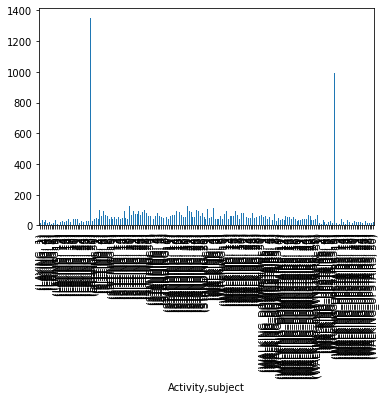

In [ ]:
final_train.groupby(cols).size().plot.bar()

In [ ]:
final_train.groupby(cols).transform(lambda x: x.isna().sum())

,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56","fBodyAcc-bandsEnergy()-49,56.1",...,tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void(),Activity_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0
1,1,12,6,5,7,11,4,7,8,8,7,10,10,10,5,8,5,16,10,2,7,5,13,12,5,7,8,9,11,2,10,6,6,4,6,7,5,3,11,6,...,5,11,10,7,3,9,8,9,11,6,12,5,5,13,10,8,7,8,5,6,6,12,8,9,9,10,12,10,8,7,9,4,7,6,6,15,13,9,8,0
2,12,11,12,7,8,5,5,11,5,8,11,6,8,10,6,10,9,9,15,10,14,9,4,11,6,8,13,8,9,7,12,13,9,10,5,8,6,11,16,17,...,9,11,10,8,10,6,10,6,10,13,12,6,11,10,12,11,14,4,7,8,13,7,5,11,8,5,7,16,7,10,8,10,7,8,14,9,4,6,12,0
3,0,0,1,0,1,0,1,0,2,0,1,0,0,1,0,0,1,1,1,0,0,0,1,0,2,2,0,0,1,0,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,2,0,1,0
4,12,11,12,7,8,5,5,11,5,8,11,6,8,10,6,10,9,9,15,10,14,9,4,11,6,8,13,8,9,7,12,13,9,10,5,8,6,11,16,17,...,9,11,10,8,10,6,10,6,10,13,12,6,11,10,12,11,14,4,7,8,13,7,5,11,8,5,7,16,7,10,8,10,7,8,14,9,4,6,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11081,1,12,6,5,7,11,4,7,8,8,7,10,10,10,5,8,5,16,10,2,7,5,13,12,5,7,8,9,11,2,10,6,6,4,6,7,5,3,11,6,...,5,11,10,7,3,9,8,9,11,6,12,5,5,13,10,8,7,8,5,6,6,12,8,9,9,10,12,10,8,7,9,4,7,6,6,15,13,9,8,0
11082,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
11083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11084,0,0,0,0,0,0,1,0,1,1,0,2,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0,0,0,0

In [ ]:
cols = ['Activity', 'subject']

filled = final_train.copy()
filled[filled.columns.difference(cols)] = final_train.groupby(cols).transform(lambda x: x.fillna(x.mean()))[filled.columns.difference(cols)]

In [ ]:
filled.head(4)

,Activity,"angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyAccMean,gravity)","angle(tBodyGyroJerkMean,gravityMean)","angle(tBodyGyroMean,gravityMean)",energy-mean(),"fBodyAcc-bandsEnergy()-1,16","fBodyAcc-bandsEnergy()-1,16.1","fBodyAcc-bandsEnergy()-1,16.2","fBodyAcc-bandsEnergy()-1,24","fBodyAcc-bandsEnergy()-1,24.1","fBodyAcc-bandsEnergy()-1,24.2","fBodyAcc-bandsEnergy()-1,8","fBodyAcc-bandsEnergy()-1,8.1","fBodyAcc-bandsEnergy()-1,8.2","fBodyAcc-bandsEnergy()-17,24","fBodyAcc-bandsEnergy()-17,24.1","fBodyAcc-bandsEnergy()-17,24.2","fBodyAcc-bandsEnergy()-17,32","fBodyAcc-bandsEnergy()-17,32.1","fBodyAcc-bandsEnergy()-17,32.2","fBodyAcc-bandsEnergy()-25,32","fBodyAcc-bandsEnergy()-25,32.1","fBodyAcc-bandsEnergy()-25,32.2","fBodyAcc-bandsEnergy()-25,48","fBodyAcc-bandsEnergy()-25,48.1","fBodyAcc-bandsEnergy()-25,48.2","fBodyAcc-bandsEnergy()-33,40","fBodyAcc-bandsEnergy()-33,40.1","fBodyAcc-bandsEnergy()-33,40.2","fBodyAcc-bandsEnergy()-33,48","fBodyAcc-bandsEnergy()-33,48.1","fBodyAcc-bandsEnergy()-33,48.2","fBodyAcc-bandsEnergy()-41,48","fBodyAcc-bandsEnergy()-41,48.1","fBodyAcc-bandsEnergy()-41,48.2","fBodyAcc-bandsEnergy()-49,56",...,tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAccMag-arCoeff()1,tGravityAccMag-arCoeff()2,tGravityAccMag-arCoeff()3,tGravityAccMag-arCoeff()4,tGravityAccMag-energy(),tGravityAccMag-entropy(),tGravityAccMag-iqr(),tGravityAccMag-mad(),tGravityAccMag-max(),tGravityAccMag-mean(),tGravityAccMag-min(),tGravityAccMag-sma(),tGravityAccMag-std(),void(),Activity_id
0,STANDING,-1.574191,-0.805700,-2.453831,-1.861714,0.115517,-2.023369,3.125860,-9.474436,3.622600,6.137246,2.503062,5.776680,3.242765,-1.352936,-1.537732,2.828395,8.603183,-2.228620,5.355308,3.987723,1.880228,1.384042,-2.163548,0.483175,2.942713,5.837147,2.957527,-1.770934,-5.580564,13.725027,1.724643,-0.519345,4.233416,0.953127,0.807692,2.624547,-3.005993,3.329588,2.866778,...,1.531084,-3.422785,1.852121,8.394366,3.246233,0.937300,4.725389,-1.578871,-0.442374,4.068593,4.705346,7.195449,-6.003664,0.607255,-1.499318,2.246320,2.861260,3.815614,-2.151051,-3.122438,-0.336110,6.357369,3.741996,1.394575,4.017211,2.481302,5.774536,1.754626,1.180533,5.049130,3.272281,5.103018,-0.823302,3.063681,-0.928676,-1.007695,3.094236,1.669987,1.0,0
1,WALKING_UPSTAIRS,-1.568669,-0.612620,-2.488338,-1.751117,0.218134,0.280294,7.953403,-0.679894,2.512880,5.740178,2.803435,5.484726,2.102368,-1.355854,-1.416568,2.527046,8.046001,-1.986672,5.284168,3.598328,1.892567,1.417711,-2.027475,0.436458,2.908602,5.819734,2.551773,-1.756530,-5.503246,13.251491,1.714753,-0.552312,3.566532,0.922455,0.726768,2.081277,-3.081267,3.140684,2.684137,...,1.585023,-3.387872,1.698743,8.112279,1.926083,2.348895,4.719540,-1.521161,-0.463599,4.063648,4.730261,7.221653,-5.789276,0.417687,-0.703212,2.488702,2.391994,5.884982,-2.187197,-3.306482,-0.814718,6.077734,3.720622,1.202847,4.050714,4.539801,4.618405,1.727481,0.220730,4.565443,4.440779,3.288399,-2.689605,1.705341,-0.822617,-0.572410,-2.187890,-0.544652,2.0,1
2,LAYING,-1.548333,-0.139628,-2.380889,-1.915239,0.067613,-0.887342,6.007361,-11.906904,3.621984,6.158630,2.495276,5.776843,3.314383,-1.352860,-1.537483,2.845718,8.618923,-2.232214,5.378175,3.998898,1.879989,1.372814,-2.169002,0.485317,2.957325,5.841023,2.974139,-1.775050,-5.600164,13.743085,1.726239,-0.505341,4.256780,0.957134,0.831419,2.640759,-2.999393,3.359696,2.868557,...,1.851578,-4.070744,1.220517,7.690866,3.055395,1.937417,4.684

In [ ]:
filled_correlated = cols_with_threshold_above(filled, 0.95)

In [ ]:
len(filled_correlated)

307

In [ ]:
filled.isna().sum()

Activity                                0
angle(X,gravityMean)                    0
angle(Y,gravityMean)                    0
angle(Z,gravityMean)                    0
angle(tBodyAccJerkMean),gravityMean)    0
                                       ..
tGravityAccMag-min()                    0
tGravityAccMag-sma()                    0
tGravityAccMag-std()                    0
void()                                  0
Activity_id                             0
Length: 573, dtype: int64

In [ ]:
final_train.iloc[:,-1].unique()

array([ 1.,  2.,  3., nan])

In [ ]:
final_train['Activity'].unique()

array(['STANDING', 'WALKING_UPSTAIRS', 'LAYING', 'WALKING', 'SITTING',
       'WALKING_DOWNSTAIRS'], dtype=object)

In [ ]:
list(df_nocorr.columns)


NameError: ignored